# **Overview**

The objective of the "Bank Customer Churn Model" project is to develop a predictive model that can accurately identify customers who are likely to churn or leave a bank. Customer churn, or customer attrition, refers to the phenomenon of customers discontinuing their relationship with a company or organization. In the banking industry, customer churn poses a significant challenge as it can lead to a loss of revenue and market share. By building an effective churn prediction model, banks can proactively identify at-risk customers and take appropriate measures to retain them.

The project aims to utilize advanced analytics and machine learning techniques to analyze historical customer data and identify patterns or factors that contribute to customer churn. By examining various customer attributes, transaction history, and behavioral patterns, the model will uncover insights into the key drivers of churn. This knowledge can then be used to develop strategies for customer retention and increase overall customer satisfaction.

# **Data Source**

For the "Bank Customer Churn Model" project, the data source is a CSV file named "Bank Churn Modelling". The dataset provides information about bank customers and their churn behavior. The data can be accessed using the following link: Bank Churn Modelling Dataset.

The dataset likely contains relevant customer information, such as demographics, account details, transaction history, and other pertinent variables. These attributes will serve as inputs for the churn prediction model. By exploring and analyzing this dataset, it will be possible to identify patterns and trends that can help predict which customers are more likely to churn.

To accomplish the project's objectives, the data will be preprocessed, including tasks such as handling missing values, transforming categorical variables, and normalizing numerical features. The dataset will then be split into training and testing sets to develop and evaluate the churn prediction model.

By leveraging the provided dataset and applying appropriate machine learning algorithms and techniques, the project aims to build a robust churn prediction model that can assist banks in identifying customers at risk of churning and implementing proactive retention strategies.

# **Import Library**

In [445]:
import pandas as pd

In [446]:
import numpy as np

In [447]:
import matplotlib.pyplot as plt

In [448]:
import seaborn as sns

# **Import Data**

In [449]:
df = pd.read_csv('https://raw.githubusercontent.com/YBIFoundation/Dataset/main/Bank%20Churn%20Modelling.csv')

# **Describe Data**

In [450]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [451]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerId        10000 non-null  int64  
 1   Surname           10000 non-null  object 
 2   CreditScore       10000 non-null  int64  
 3   Geography         10000 non-null  object 
 4   Gender            10000 non-null  object 
 5   Age               10000 non-null  int64  
 6   Tenure            10000 non-null  int64  
 7   Balance           10000 non-null  float64
 8   Num Of Products   10000 non-null  int64  
 9   Has Credit Card   10000 non-null  int64  
 10  Is Active Member  10000 non-null  int64  
 11  Estimated Salary  10000 non-null  float64
 12  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [452]:
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [453]:
df.duplicated('CustomerId').sum()

0

In [454]:
df = df.set_index('CustomerId')

In [455]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 15634602 to 15628319
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Surname           10000 non-null  object 
 1   CreditScore       10000 non-null  int64  
 2   Geography         10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Tenure            10000 non-null  int64  
 6   Balance           10000 non-null  float64
 7   Num Of Products   10000 non-null  int64  
 8   Has Credit Card   10000 non-null  int64  
 9   Is Active Member  10000 non-null  int64  
 10  Estimated Salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 1015.6+ KB


# **Data Encoding**

In [456]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [457]:
df.replace({'Geography':{'France':2,'Germany':1,'Spain':0}},inplace=True)

In [458]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [459]:
df.replace({'Gender':{'Male':0,'Female':1}},inplace=True)

In [460]:
df['Num Of Products'].value_counts()

1    5084
2    4590
3     266
4      60
Name: Num Of Products, dtype: int64

In [461]:
df.replace({'Num Of Products':{1:0,2:1,3:1,4:1}})

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
CustomerId,,,,,,,,,,,,
15634602,Hargrave,619,2,1,42,2,0.00,0,1,1,101348.88,1
15647311,Hill,608,0,1,41,1,83807.86,0,0,1,112542.58,0
15619304,Onio,502,2,1,42,8,159660.80,1,1,0,113931.57,1
15701354,Boni,699,2,1,39,1,0.00,1,0,0,93826.63,0
15737888,Mitchell,850,0,1,43,2,125510.82,0,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
15606229,Obijiaku,771,2,0,39,5,0.00,1,1,0,96270.64,0
15569892,Johnstone,516,2,0,35,10,57369.61,0,1,1,101699.77,0
15584532,Liu,709,2,1,36,7,0.00,0,0,1,42085.58,1


In [462]:
df['Has Credit Card'].value_counts()

1    7055
0    2945
Name: Has Credit Card, dtype: int64

In [463]:
df['Is Active Member'].value_counts()

1    5151
0    4849
Name: Is Active Member, dtype: int64

In [464]:
df.loc[(df['Balance']==0),'Churn'].value_counts()

0    3117
1     500
Name: Churn, dtype: int64

In [465]:
df['Zero Balance'] = np.where(df['Balance']>0,1,0)

<Axes: >

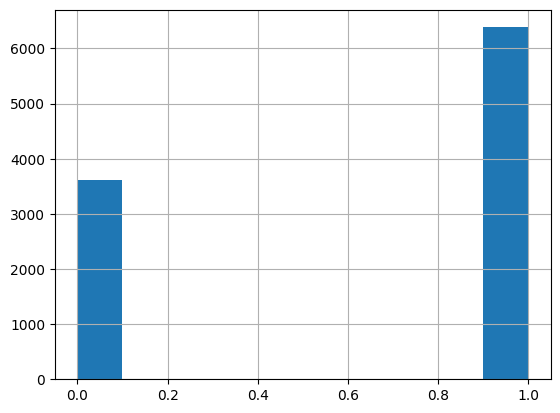

In [466]:
df['Zero Balance'].hist()

In [467]:
df.groupby(['Churn','Geography']).count()

Surname  CreditScore  Gender   Age  Tenure  Balance  \
Churn Geography                                                        
0     0             2064         2064    2064  2064    2064     2064   
      1             1695         1695    1695  1695    1695     1695   
      2             4204         4204    4204  4204    4204     4204   
1     0              413          413     413   413     413      413   
      1              814          814     814   814     814      814   
      2              810          810     810   810     810      810   

                 Num Of Products  Has Credit Card  Is Active Member  \
Churn Geography                                                       
0     0                     2064             2064              2064   
      1                     1695             1695              1695   
      2                     4204             4204              4204   
1     0                      413              413               413   
      1                      814              814               814   
      2                      810              810               810   

                 Estimated Salary  Zero Balance  
Churn Geography                                  
0     0                      2064          2064  
      1                      1695          1695  
      2                      4204          4204  
1     0                       413           413  
      1                       814           814  
      2                       810           810

# **Define Label and Features**

In [468]:
df.columns

Index(['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'Num Of Products', 'Has Credit Card', 'Is Active Member',
       'Estimated Salary', 'Churn', 'Zero Balance'],
      dtype='object')

In [469]:
x = df.drop(['Surname','Churn'],axis=1)

In [470]:
y = df['Churn']

In [471]:
x.shape,y.shape

((10000, 11), (10000,))

# **Handling Imbalance Data**



In [472]:
df['Churn'].value_counts()

0    7963
1    2037
Name: Churn, dtype: int64

<Axes: xlabel='Churn', ylabel='count'>

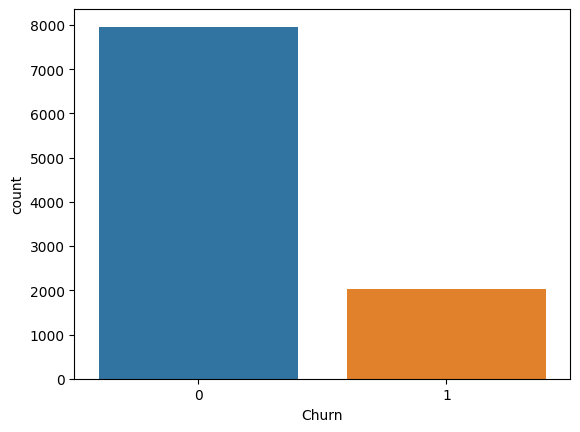

In [473]:
sns.countplot(x='Churn',data=df)

In [474]:
x.shape,y.shape

((10000, 11), (10000,))

# **Random Under Sampling**

In [475]:
from imblearn.under_sampling import RandomUnderSampler

In [476]:
rus = RandomUnderSampler(random_state=2529)

In [477]:
x_rus,y_rus = rus.fit_resample(x,y)

In [478]:
x_rus,y_rus,x.shape,y.shape

(      CreditScore  Geography  Gender  Age  Tenure    Balance  Num Of Products  \
 0             648          1       0   31       7  125681.51                1   
 1             759          2       0   41       9       0.00                2   
 2             728          2       0   33       8  129907.63                1   
 3             599          2       1   43       4       0.00                1   
 4             664          1       0   26       7  116244.14                2   
 ...           ...        ...     ...  ...     ...        ...              ...   
 4069          498          1       0   42       3  152039.70                1   
 4070          655          1       1   46       7  137145.12                1   
 4071          597          2       1   53       4   88381.21                1   
 4072          709          2       1   36       7       0.00                1   
 4073          772          1       0   42       3   75075.31                2   
 
       Has Cre

In [479]:
y.value_counts()

0    7963
1    2037
Name: Churn, dtype: int64

In [480]:
y_rus.value_counts()

0    2037
1    2037
Name: Churn, dtype: int64

<Axes: ylabel='Frequency'>

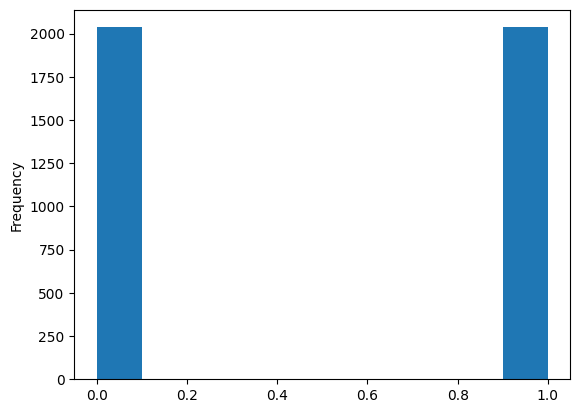

In [481]:
y_rus.plot(kind='hist')

# **Random Over Sampling**

In [482]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=2529)

In [483]:
x_ros,y_ros = ros.fit_resample(x,y)

In [484]:
x_ros.shape,y_ros.shape,x.shape,y.shape

((15926, 11), (15926,), (10000, 11), (10000,))

In [485]:
y.value_counts()

0    7963
1    2037
Name: Churn, dtype: int64

In [486]:
y_ros.value_counts()

1    7963
0    7963
Name: Churn, dtype: int64

<Axes: ylabel='Frequency'>

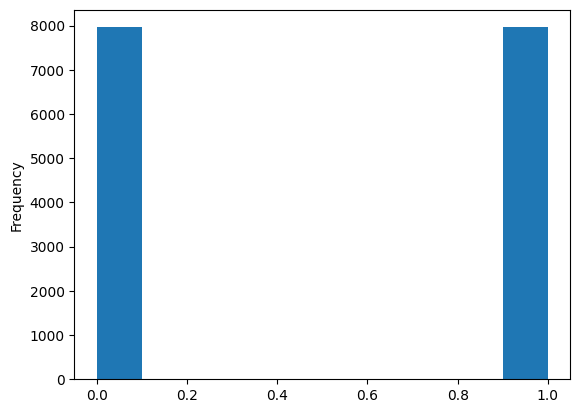

In [487]:
y_ros.plot(kind='hist')

# **Train Test Split**

In [488]:
from sklearn.model_selection import train_test_split

### **Split Original Data**

In [489]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=2529)

### **Split Random Under Sampling Data**

In [490]:
x_train_rus,x_test_rus,y_train_rus,y_test_rus = train_test_split(x_rus,y_rus,test_size=0.3,random_state=2529)

### **Split Random Over Sampling**

In [491]:
x_train_ros,x_test_ros,y_train_ros,y_test_ros = train_test_split(x_ros,y_ros,test_size=0.3,random_state=2529)

# **Standardize Random Sampling**

In [492]:
from sklearn.preprocessing import StandardScaler

In [493]:
sc = StandardScaler()

### **Standardize Original Data**

In [494]:
x_train[['CreditScore','Age','Tenure','Balance']] = sc.fit_transform(x_train[['CreditScore','Age','Tenure','Balance']])

In [495]:
x_test[['CreditScore','Age','Tenure','Balance']] = sc.fit_transform(x_test[['CreditScore','Age','Tenure','Balance']])

### **Standardize Random Under Sampling Data**

In [496]:
x_train_rus[['CreditScore','Age','Tenure','Balance']] = sc.fit_transform(x_train_rus[['CreditScore','Age','Tenure','Balance']])

In [497]:
x_test_rus[['CreditScore','Age','Tenure','Balance']] = sc.fit_transform(x_test_rus[['CreditScore','Age','Tenure','Balance']])

### **Standardize Random Over Sampling Data**

In [498]:
x_train_ros[['CreditScore','Age','Tenure','Balance']] = sc.fit_transform(x_train_ros[['CreditScore','Age','Tenure','Balance']])

In [499]:
x_test_ros[['CreditScore','Age','Tenure','Balance']] = sc.fit_transform(x_test_ros[['CreditScore','Age','Tenure','Balance']])

# **Support Vector Classifier**

In [500]:
from sklearn.svm import SVC

In [501]:
svc = SVC()

In [502]:
svc.fit(x_train,y_train)

SVC()

In [503]:
y_pred = svc.predict(x_test)

# **Model Accuracy**

In [504]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [505]:
confusion_matrix(y_test,y_pred)

array([[2414,    0],
       [ 586,    0]])

In [506]:
accuracy_score(y_test,y_pred)

0.8046666666666666

In [507]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      2414
           1       0.00      0.00      0.00       586

    accuracy                           0.80      3000
   macro avg       0.40      0.50      0.45      3000
weighted avg       0.65      0.80      0.72      3000



# **Hyperparameter Tuning**

In [508]:
from sklearn.model_selection import GridSearchCV

In [509]:
param_grid = {'C':[0.1,1,10],
              'gamma':[1,0.1,0.01],
              'kernel':['rbf'],
              'class_weight':['balanced']}

In [510]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2,cv=2)
grid.fit(x_train,y_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.5s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.5s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.5s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.5s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.7s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.8s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   3.0s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.6s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.6s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.6s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.7s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [511]:
print(grid.best_estimator_)

SVC(C=1, class_weight='balanced', gamma=1)


In [512]:
grid_predictions = grid.predict(x_test)

In [513]:
confusion_matrix(y_test,grid_predictions)

array([[2414,    0],
       [ 586,    0]])

In [514]:
accuracy_score(y_test,grid_predictions)

0.8046666666666666

In [515]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      2414
           1       0.00      0.00      0.00       586

    accuracy                           0.80      3000
   macro avg       0.40      0.50      0.45      3000
weighted avg       0.65      0.80      0.72      3000



In [516]:
svc_rus = SVC()

In [517]:
svc_rus.fit(x_train,y_train)

SVC()

In [518]:
y_pred_rus = svc_rus.predict(x_test_rus)

In [519]:
confusion_matrix(y_test_rus,y_pred_rus)

array([[627,   0],
       [596,   0]])

In [520]:
print(classification_report(y_test_rus,y_pred_rus))

              precision    recall  f1-score   support

           0       0.51      1.00      0.68       627
           1       0.00      0.00      0.00       596

    accuracy                           0.51      1223
   macro avg       0.26      0.50      0.34      1223
weighted avg       0.26      0.51      0.35      1223



In [521]:
param_grid_rus = {'C':[0.1,1,10],
              'gamma':[1,0.1,0.01],
              'kernel':['rbf'],
              'class_weight':['balanced']}

In [522]:
grid_rus = GridSearchCV(SVC(),param_grid,refit=True,verbose=2,cv=2)

In [523]:
grid_rus.fit(x_train_rus,y_train_rus)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.3s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.3s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.3s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.3s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.3s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [524]:
print(grid_rus.best_estimator_)

SVC(C=1, class_weight='balanced', gamma=0.1)


In [525]:
grid_predictions_rus = grid_rus.predict(x_test_rus)

In [526]:
confusion_matrix(y_test_rus,grid_predictions_rus)

array([[ 46, 581],
       [ 40, 556]])

In [527]:
accuracy_score(y_test_rus,grid_predictions_rus)

0.4922322158626329

In [528]:
print(classification_report(y_test_rus,grid_predictions_rus))

              precision    recall  f1-score   support

           0       0.53      0.07      0.13       627
           1       0.49      0.93      0.64       596

    accuracy                           0.49      1223
   macro avg       0.51      0.50      0.39      1223
weighted avg       0.51      0.49      0.38      1223



In [529]:
svc_ros = SVC()

In [530]:
svc_ros.fit(x_train,y_train)

SVC()

In [531]:
y_pred_ros = svc_ros.predict(x_test_ros)

In [532]:
confusion_matrix(y_test_ros,y_pred_ros)

array([[2379,    0],
       [2399,    0]])

In [533]:
print(classification_report(y_test_ros,y_pred_ros))

              precision    recall  f1-score   support

           0       0.50      1.00      0.66      2379
           1       0.00      0.00      0.00      2399

    accuracy                           0.50      4778
   macro avg       0.25      0.50      0.33      4778
weighted avg       0.25      0.50      0.33      4778



In [534]:
param_grid_ros = {'C':[0.1,1,10],
              'gamma':[1,0.1,0.01],
              'kernel':['rbf'],
              'class_weight':['balanced']}

In [535]:
grid_ros = GridSearchCV(SVC(),param_grid,refit=True,verbose=2,cv=2)

In [536]:
grid_ros.fit(x_train_ros,y_train_ros)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   5.5s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   3.9s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   4.1s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   5.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   4.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   4.3s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   5.3s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   4.1s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   4.7s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   6.1s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   4.1s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [537]:
print(grid_ros.best_estimator_)

SVC(C=1, class_weight='balanced', gamma=1)


In [538]:
grid_predictions_ros = grid_ros.predict(x_test_ros)

In [539]:
confusion_matrix(y_test_ros,grid_predictions_ros)

array([[2379,    0],
       [ 125, 2274]])

In [540]:
accuracy_score(y_test_ros,grid_predictions_ros)

0.9738384261197154

In [541]:
print(classification_report(y_test_ros,grid_predictions_ros))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      2379
           1       1.00      0.95      0.97      2399

    accuracy                           0.97      4778
   macro avg       0.98      0.97      0.97      4778
weighted avg       0.98      0.97      0.97      4778

